In [3]:
from CTILP_Optimization import *
%matplotlib inline

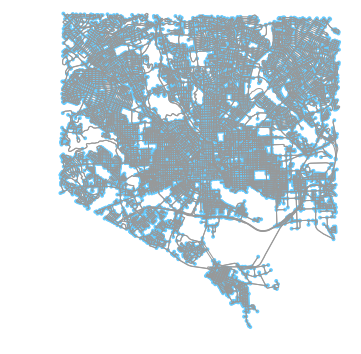

In [5]:
#### plot Baltimore City Footprint
G = ox.graph_from_place('Baltimore, Maryland, USA', network_type='drive', which_result=2)
G_proj = ox.project_graph(G)
fig, ax = ox.plot_graph(G_proj)

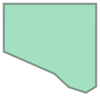

In [8]:
#### Get City polygon
a = ox.gdf_from_place('Baltimore, Maryland, USA', which_result=2)
a.geometry[0]

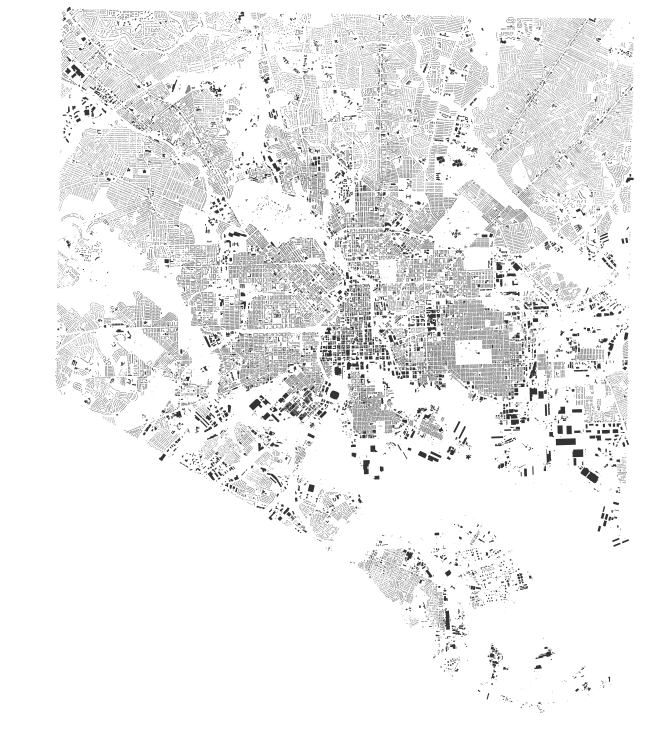

In [10]:
#### Get buildins gdf 
gdf = ox.create_buildings_gdf(polygon = a.geometry[0])
gdfproject = ox.project_gdf(gdf)
fig, ax = ox.plot_buildings(gdfproject, figsize=(13,13))

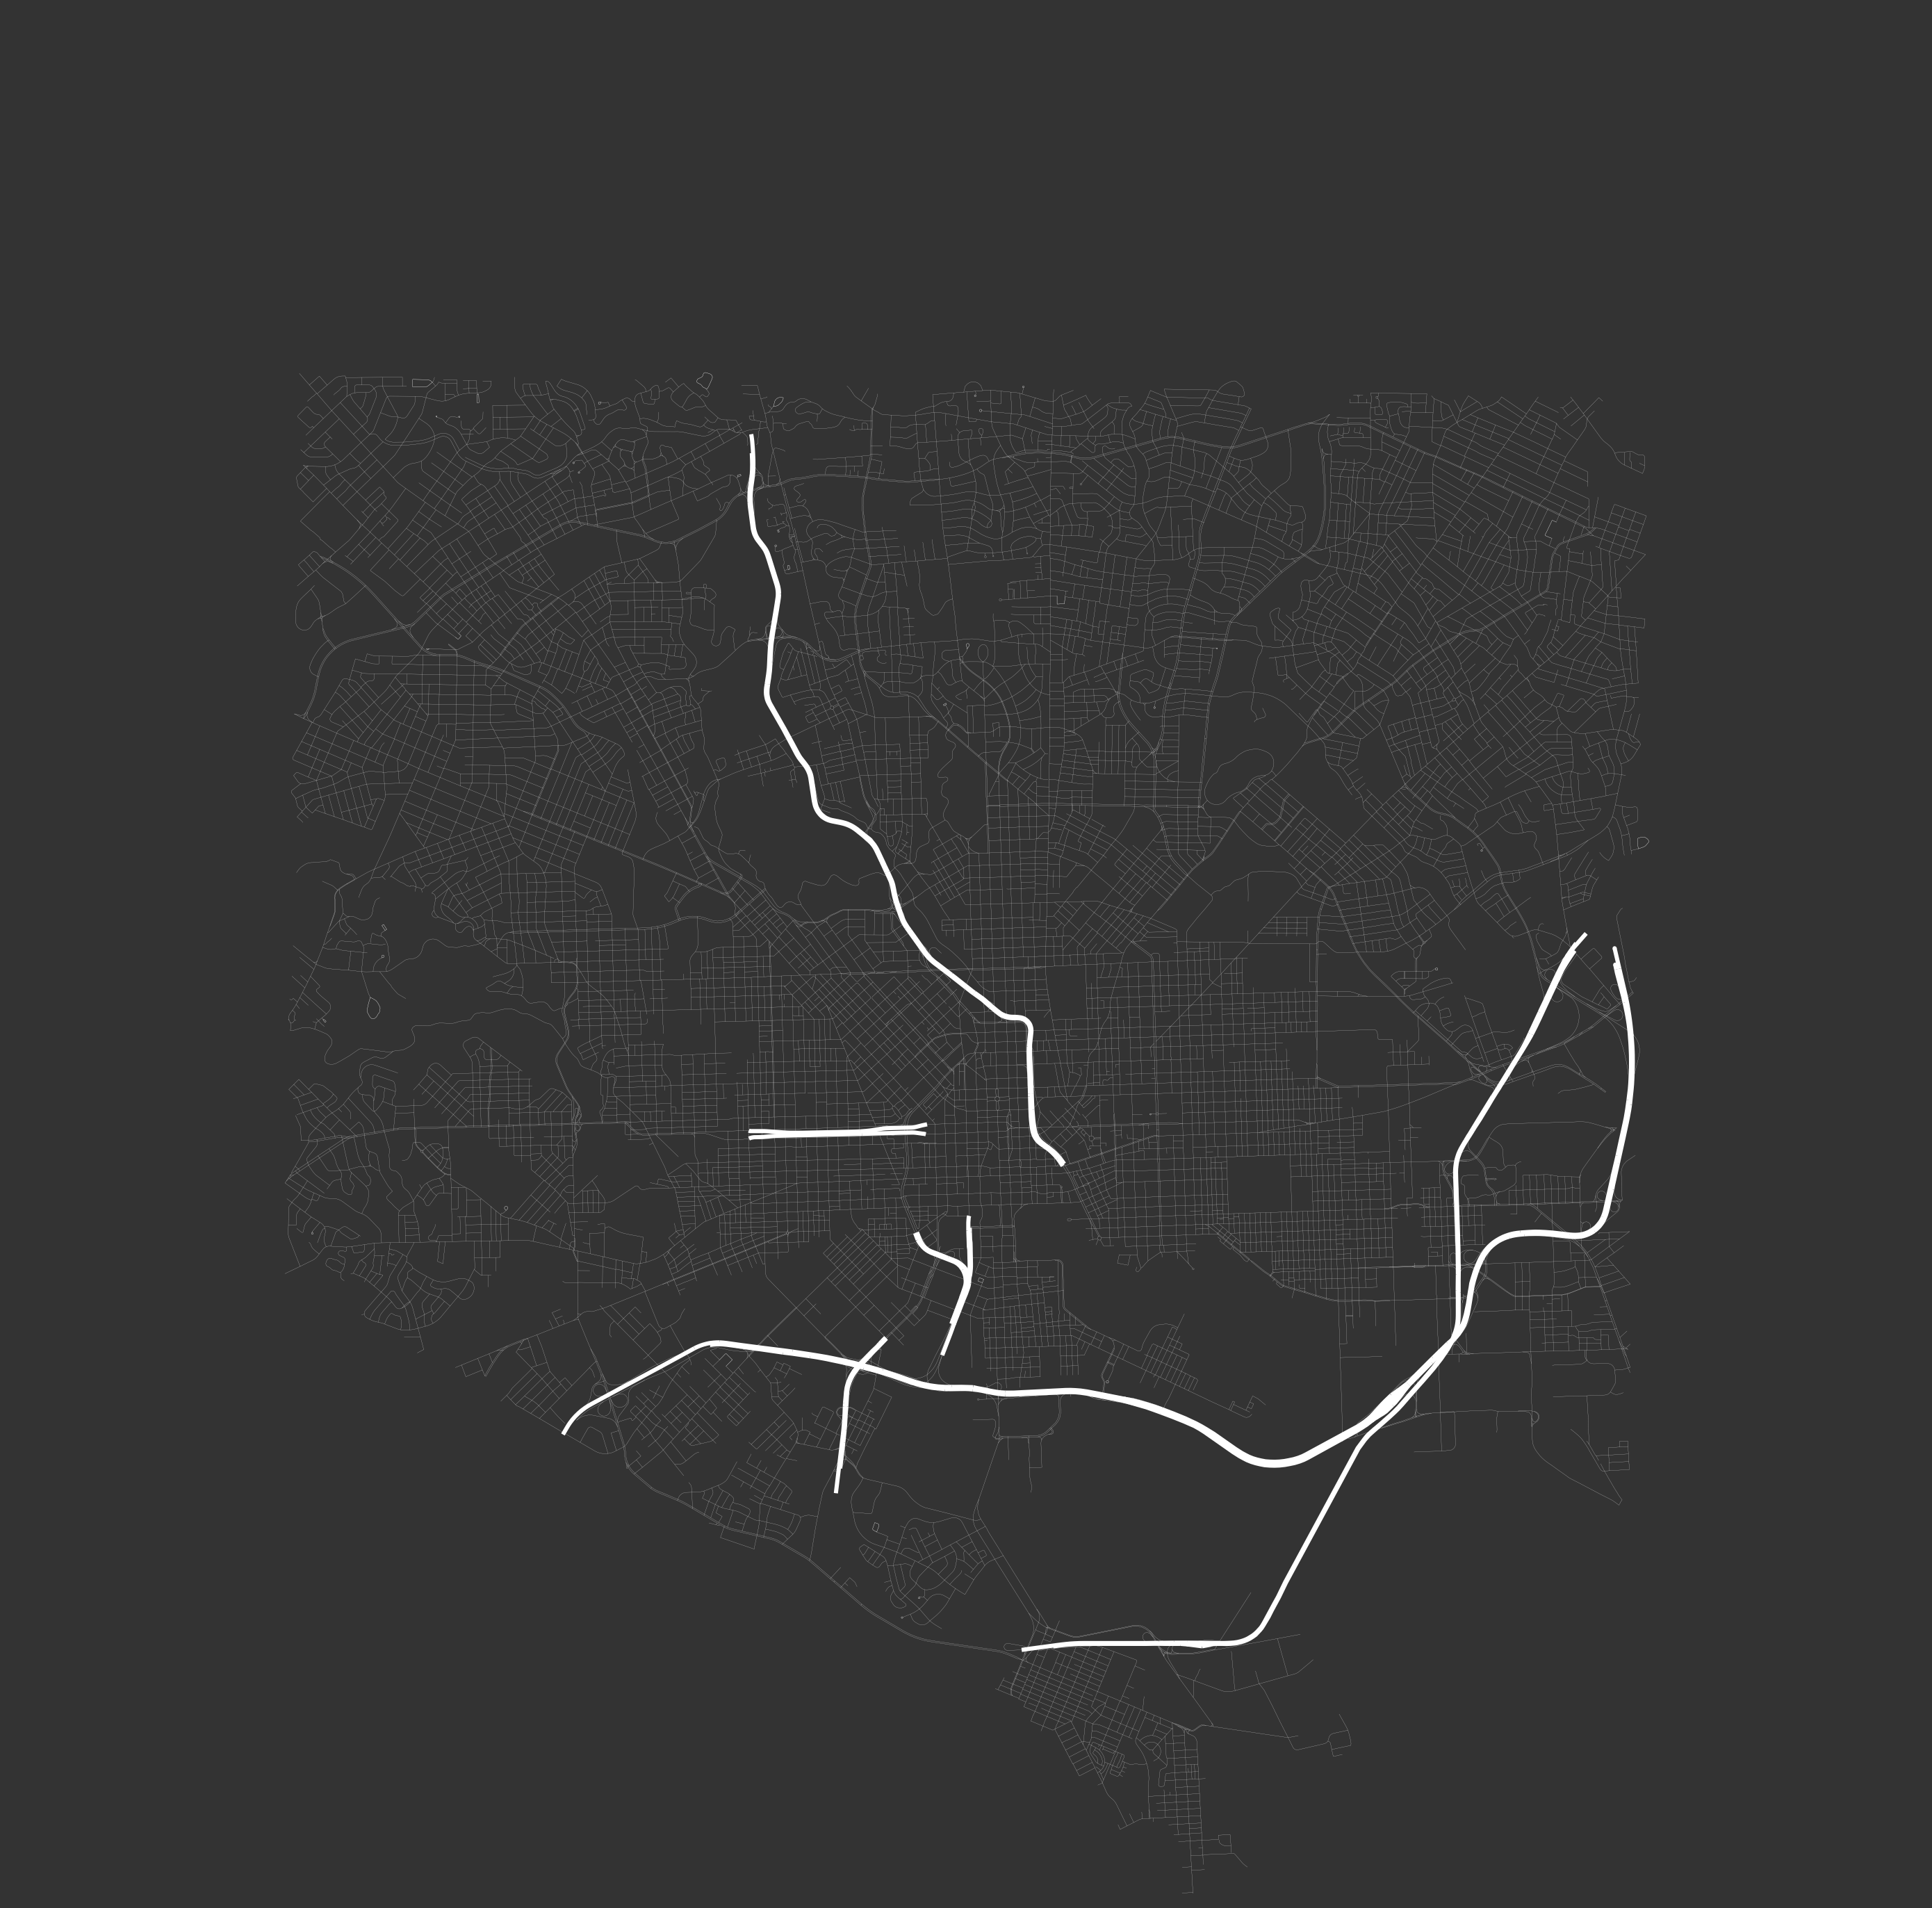

In [12]:
#### Get the Distance
a.geometry.centroid
dis = ox.utils.great_circle_vec(a.geometry.centroid[0].x,
                                a.geometry.centroid[0].y,
                                -76.711298,
                                39.197233)

#### plot and save the footprint
fig, ax = ox.plot_figure_ground(G = G,  dist= dis/1.05,
                                network_type='walk', 
                                default_width=0.2,
                                    street_widths=None, save=False, show=True, close=True, fig_length = 50)

fig, ax = ox.plot_buildings(gdfproject, fig=fig, ax=ax, color='orange', set_bounds=False,
                                save=True, show=False, close=True, filename="whole_city_footprint", dpi=180)

# Vacant Houses for whole city

In [13]:
# openstreetmap format
np.unique(gdfproject['addr:street'])

/anaconda/envs/OSMNX/lib/python2.7/site-packages/numpy/lib/arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


array([nan, u'10th Street', u'29th Division Street', ..., u'Yorkwood Road',
       u'Yosemite Avenue', u'Youngstown Avenue'], dtype=object)

#### Match Vacant House

In [137]:
import csv
import pandas as pd
vacant_Baltimore = pd.read_csv('CleanDataBase/vacant_Baltimore.csv',sep='\t') # create header later

In [138]:
vacant_Baltimore = vacant_Baltimore.drop("Unnamed: 0", 1)
vacant_Baltimore[:1]

,Full Address,BLT,Vacant,zip+4,zip,street,housenumber
0,3838 REISTERSTOWN RD BALTIMORE | MD 21215-7616,0x00690C0000201400000020,1,7616,21215,Reisterstown Road,3838


In [139]:
vacant_Baltimore.loc[:,"street"] = vacant_Baltimore.loc[:,"street"].str[1:-1]

In [99]:
result = pd.concat([gdf["addr:street"].isnull() == False, gdf["building"] == "yes" ], axis=1)

In [109]:
result["sum"] = result["addr:street"] & result["building"]
result

,addr:street,building,sum
24617367,False,False,False
24617369,False,False,False
49666537,False,True,False
49666620,False,False,False
49800395,False,True,False
51724390,False,True,False
51724391,False,True,False
51724440,False,True,False
51724691,False,True,False
51724692,False,True,False


In [180]:
street_gdf = gdf[result["sum"]]
print(len(street_gdf))

def vacant_generator(i,j):
    
    while i < len(street_gdf.index):
        while j < len(vacant_Baltimore.index):
            if (street_gdf['addr:street'][street_gdf.index[i]] == vacant_Baltimore['street'][vacant_Baltimore.index[j]] and 
                street_gdf['addr:housenumber'][street_gdf.index[i]] == vacant_Baltimore['housenumber'][vacant_Baltimore.index[j]]):
                
                yield street_gdf.index[i],vacant_Baltimore.index[j], street_gdf['addr:street'][street_gdf.index[i]], street_gdf['addr:housenumber'][street_gdf.index[i]]
            yield street_gdf.index[i],vacant_Baltimore.index[j],None,None
            j += 1
        
        if i%1000==0:
            print i
            
        i += 1
        j = 0
        
                #m.gdf.loc[i,'housetype'] = 2
            #elif m.gdf['housetype'][i] == 2:
                #m.gdf.loc[i,'housetype'] = 1

197664


In [179]:
#gdf[gdf['addr:street'] == vacant_Baltimore['street'][vacant_Baltimore.index[0]]]['addr:housenumber'] == "3838"
#vacant_Baltimore['housenumber'][vacant_Baltimore.index[0]]

In [182]:
vacantOSMNX = []
vacantdb25 = []

for i,j,street,housenumber in vacant_generator(0,0):
    if street != None:
        print street, housenumber, i, j
    vacantOSMNX.append(i)
    vacantdb25.append(j)

Pulaski Highway 4006 188579014 1439
Pulaski Highway 4023 188579025 6486
Holabird Avenue 6640 244177040 1546
Wilkens Avenue 2804 262894736 2246
Wicomico Street 2231 279481850 8157
Maisel Street 2034 279481851 5744
Wicomico Street 2214 279481862 1585
Hollins Ferry Road 2201 279481864 911
Wicomico Street 2121 279481873 2389
Washington Boulevard 2301 296561744 7522
Washington Boulevard 2311 296561749 888
Glenmore Avenue 4338 336162461 2985
Graceland Avenue 6749 336162490 7223
East Northern Parkway 4110 336162520 3924
Raspe Avenue 4430 336162951 6896
Belmar Avenue 4222 336163182 6438
Raspe Avenue 4429 336163273 2955
Whitby Road 5568 336163282 5841
Belmar Avenue 4220 336163436 6433
Gough Street 6817 336163587 5866
Darien Road 5135 336163847 913
Darien Road 5149 336163849 2188
Cedonia Avenue 5461 336164945 5338
Powell Avenue 4507 336165020 7509
East Northern Parkway 4001 336165166 545
Cedgate Road 5231 336165214 2341
Bethlehem Avenue 1101 336165371 1322
Graceland Avenue 6705 336165407 6181
Ch

East Pratt Street 3600 336214028 4769
Eierman Avenue 3903 336214036 5163
Eierman Avenue 3901 336214037 2810
Harris Avenue 4101 336214041 6144
Esther Place 3628 336214108 7180
Esther Place 3620 336214118 1712
Shirey Avenue 2918 336214378 7846
South Conkling Street 714 336214430 1884
Elmora Avenue 3632 336214473 6534
Ailsa Avenue 2817 336214934 747
Laurelton Avenue 5619 336215250 5621
Mount Pleasant Avenue 3512 336215387 6732
East Lombard Street 3400 336215461 2656
Harford Road 4800 336215535 8256
Kenyon Avenue 3141 336215592 7657
Elmley Avenue 3628 336215701 7133
East Fairmount Avenue 3402 336215773 3930
East Fairmount Avenue 3530 336215776 7282
East Fairmount Avenue 3406 336215777 2807
Noble Street 3514 336215949 2815
Noble Street 3500 336215951 1726
Noble Street 3406 336215964 1730
Evergreen Avenue 2304 336216233 5634
Heckel Avenue 4211 336216253 2205
East Fayette Street 3520 336216353 6967
Leverton Avenue 3418 336216377 4421
North Conkling Street 204 336216407 2782
Laurelton Avenue 5

East Fayette Street 3105 336236741 5264
Cardenas Avenue 3524 336237062 1090
Cardenas Avenue 3528 336237066 424
Mainfield Avenue 4601 336237090 2014
Pelham Avenue 2755 336237128 1569
North Robinson Street 322 336237402 2980
North Robinson Street 412 336237466 7926
North Robinson Street 524 336237486 386
North Robinson Street 504 336237496 6894
North Robinson Street 526 336237506 8114
Lawnview Avenue 3202 336237543 2277
Edison Highway 1218 336237580 7041
Pelham Avenue 2744 336237695 1556
North Ellwood Avenue 419 336238232 552
North Ellwood Avenue 411 336238252 7646
North Ellwood Avenue 417 336238271 7928
North Robinson Street 620 336238877 3596
North Ellwood Avenue 601 336239927 6680
North Ellwood Avenue 625 336239942 4577
North Ellwood Avenue 619 336239947 6876
Hudson Street 3002 336239967 4339
East Monument Street 3101 336240218 6673
East Monument Street 3111 336240222 7394
Parkside Drive 3014 336240683 1967
Belair Road 3241 336240707 6219
Belair Road 3239 336240709 2300
Cliftmont Aven

East Biddle Street 2615 336259486 7832
North Glover Street 600 336259516 5682
North Glover Street 616 336259520 6337
North Glover Street 624 336259522 2767
North Glover Street 626 336259528 8470
East Madison Street 2617 336259562 1498
North Luzerne Avenue 523 336259610 8405
North Luzerne Avenue 543 336259614 2559
North Luzerne Avenue 527 336259620 135
North Luzerne Avenue 537 336259631 7680
Ashland Avenue 2612 336259634 1813
Grogan Avenue 2607 336259715 1047
Grogan Avenue 2609 336259718 1148
North Glover Street 800 336259747 1791
North Glover Street 814 336259750 5541
North Luzerne Avenue 443 336259947 1334
East Oliver Street 2605 336259975 1618
East Oliver Street 2603 336259984 1229
Llewelyn Avenue 2605 336260006 1622
East Monument Street 2614 336260015 7916
East Monument Street 2616 336260021 2017
East Preston Street 2622 336260042 728
East Biddle Street 2608 336260142 8000
East Monument Street 2613 336260221 143
East Monument Street 2609 336260222 5671
East Belvedere Avenue 1817 336

Cedarcroft Road 1439 336270651 3480
North Patterson Park Avenue 834 336270737 1021
North Bradford Street 1610 336270805 6890
North Bradford Street 1622 336270806 2979
North Bradford Street 1616 336270818 403
North Bradford Street 1618 336270837 6380
North Patterson Park Avenue 1433 336271088 3840
North Patterson Park Avenue 1431 336271089 1656
North Patterson Park Avenue 1521 336271169 13
North Patterson Park Avenue 1537 336271175 7985
North Patterson Park Avenue 1525 336271192 16
North Patterson Park Avenue 1331 336271273 4717
North Patterson Park Avenue 1307 336271276 999
North Patterson Park Avenue 1611 336271364 2133
North Patterson Park Avenue 1617 336271365 795
North Patterson Park Avenue 1619 336271370 5135
North Patterson Park Avenue 1601 336271388 4113
North Patterson Park Avenue 1641 336271401 2987
North Patterson Park Avenue 1008 336271405 1123
North Patterson Park Avenue 1000 336271408 2851
Jefferson Street 2231 336271433 554
North Madeira Street 211 336271469 7202
Orleans 

Carswell Street 1732 336295821 47
Rutland Avenue 1835 336295949 4310
Rutland Avenue 1841 336295956 3960
Rutland Avenue 1837 336295962 6767
Rutland Avenue 1803 336295966 7647
East Lafayette Avenue 1802 336296199 6764
East Lafayette Avenue 1808 336296200 6546
Rutland Avenue 1613 336296256 3181
The Alameda 2803 336296276 806
The Alameda 2809 336296279 8109
Pentwood Road 1384 336296394 4465
Argonne Drive 1505 336296406 8272
East Preston Street 1754 336296515 4844
Chilton Street 1650 336296557 3790
Chilton Street 1624 336296563 3464
Carswell Street 1739 336296577 7086
Carswell Street 1737 336296579 69
Gleneagle Road 1201 336296619 6431
East Biddle Street 1723 336296716 5998
Sagra Road 5610 336296745 322
East Oliver Street 1730 336296780 4043
East Oliver Street 1718 336296781 6513
East Oliver Street 1714 336296786 1032
South Broadway 249 336296832 738
East North Avenue 1815 336296841 6769
Rutland Avenue 1518 336296849 1280
Gorsuch Avenue 1742 336296997 7702
Gorsuch Avenue 1744 336296998 7275

The Alameda 5001 336317376 4194
Darley Avenue 1202 336317459 3831
The Alameda 4019 336317558 1091
South Central Avenue 135 336317736 792
Aiken Street 2204 336317806 5417
South Central Avenue 311 336317823 3757
North Spring Street 1516 336317887 288
North Eden Street 1219 336317903 5548
Bonaparte Avenue 1234 336318015 3460
Cecil Avenue 2580 336318030 5535
Cecil Avenue 2560 336318041 4685
Cecil Avenue 2542 336318051 5502
East Biddle Street 1404 336318088 6731
East Lafayette Avenue 1403 336318250 2386
Homestead Street 1401 336318258 8480
Cecil Avenue 2533 336318276 4674
Cecil Avenue 2525 336318284 4893
North Eden Street 1509 336318388 1119
North Eden Street 1511 336318389 8201
Darley Avenue 1105 336318648 4414
Darley Avenue 1109 336318653 6243
Ednor Road 3914 336318879 7103
Kenilworth Avenue 5203 336319455 6005
Aiken Street 2118 336319464 1212
Aiken Street 2124 336319492 5822
The Alameda 4107 336319534 1565
North Eden Street 1008 336319696 4892
North Eden Street 1006 336319711 5586
North 

Greenmount Avenue 3407 336349105 3231
Greenmount Avenue 3403 336349107 7273
Cedarcroft Road 501 336349161 7035
Orkney Road 508 336349337 4242
York Road 4513 336349356 745
Greenmount Avenue 3933 336349372 4675
Greenmount Avenue 2531 336349389 1417
Greenmount Avenue 1907 336349400 6740
East Lake Avenue 500 336349436 1755
Greenmount Avenue 3925 336349457 1818
Greenmount Avenue 4031 336349464 1179
Chateau Avenue 546 336349609 2562
Radnor Avenue 503 336349690 2196
Greenmount Avenue 2731 336349756 2494
Orkney Road 501 336349775 7920
Greenmount Avenue 3133 336349819 3914
Greenmount Avenue 3607 336349870 3244
East Federal Street 436 336349892 3437
East Federal Street 446 336349898 2863
East Federal Street 454 336349906 8462
Greenmount Avenue 3349 336349918 2808
Greenmount Avenue 3353 336349921 8319
Greenmount Avenue 2707 336349940 2485
Greenmount Avenue 2717 336349941 2489
Greenmount Avenue 2713 336349942 5787
East Lake Avenue 503 336350099 2775
Brentwood Avenue 1224 336350165 6820
Tunbridge R

North Howard Street 415 336379695 4029
North Howard Street 315 336379737 4300
North Howard Street 323 336379747 4152
North Howard Street 321 336379748 3901
North Howard Street 313 336379749 4027
North Howard Street 891 336380122 4716
North Howard Street 402 336380737 4159
West Lorraine Avenue 220 336380781 1182
Huntingdon Avenue 2209 336380900 68
West Lorraine Avenue 201 336381068 2320
Huntingdon Avenue 2615 336381612 2333
West Madison Street 315 336381812 5474
Cresmont Avenue 2900 336381913 671
West Saratoga Street 411 336381918 4442
North Eutaw Street 602 336381929 6193
North Eutaw Street 600 336381930 920
Remington Avenue 2803 336382173 221
Remington Avenue 2819 336382176 8556
Remington Avenue 2829 336382177 8533
North Paca Street 317 336382372 4767
Huntingdon Avenue 2610 336382525 761
Miles Avenue 2609 336382804 1537
Miles Avenue 2617 336382813 3287
West Saratoga Street 423 336382939 4556
Miles Avenue 2602 336383027 909
Huntingdon Avenue 2700 336383179 1509
West Franklin Street 420

Division Street 1807 336415742 1213
Division Street 1827 336415747 3351
West Lombard Street 1042 336415807 3755
West Lombard Street 1046 336415816 7023
Linden Avenue 2239 336415914 3532
Annapolis Road 2417 336415945 7925
Bennett Place 1001 336415983 3782
Bennett Place 1003 336415985 2973
Waterview Avenue 2812 336416060 5242
Booth Street 1029 336416233 3503
Booth Street 1026 336416241 3024
South Carey Street 1218 336416494 5675
South Carey Street 1216 336416516 8479
Argyle Avenue 1548 336416614 4224
Argyle Avenue 1542 336416633 1235
Linden Avenue 2327 336416690 6595
Linden Avenue 2323 336416693 3536
Druid Hill Avenue 1929 336416983 7245
Druid Hill Avenue 1913 336416989 585
Druid Hill Avenue 1915 336416990 587
Laurens Street 575 336417014 3881
West Lafayette Avenue 1009 336417035 4494
South Arlington Avenue 15 336417062 2155
Brooks Lane 816 336417075 3315
South Arlington Avenue 45 336417124 4564
South Arlington Avenue 49 336417125 7322
Harlem Avenue 1031 336417171 4127
Carroll Street 135

West Mulberry Street 1207 336425477 7326
West Mulberry Street 1213 336425479 4695
Glyndon Avenue 1322 336425661 519
Glyndon Avenue 1314 336425663 514
Rankin Place 1226 336425688 2452
West Lanvale Street 1218 336425705 5247
Gold Street 508 336425739 1719
Gold Street 510 336425741 1019
Gold Street 502 336425743 1462
West North Avenue 1221 336425779 207
North Carey Street 239 336425786 3606
North Carey Street 229 336425791 1558
Druid Hill Avenue 2222 336425798 689
Druid Hill Avenue 2228 336425799 8412
Druid Hill Avenue 2208 336425803 8593
Druid Hill Avenue 2218 336425805 4151
Druid Hill Avenue 2204 336425807 2075
Druid Hill Avenue 2214 336425812 7261
North Stockton Street 1305 336425836 590
Edmondson Avenue 1213 336425839 4693
North Carey Street 205 336425874 4003
North Carey Street 207 336425876 4007
North Carey Street 211 336425878 3629
Herkimer Street 1317 336426029 503
Herkimer Street 1319 336426046 6297
Herkimer Street 1331 336426053 8283
Bayard Street 905 336426251 5001
South Carey 

West Lexington Street 1707 336442317 8211
North Bruce Street 317 336442367 5199
West Pratt Street 1712 336442432 921
West Pratt Street 1718 336442438 5942
South Bruce Street 202 336442451 1366
South Bruce Street 214 336442469 1816
North Mount Street 922 336442531 5411
Ramsay Street 1724 336442589 5993
Ramsay Street 1714 336442591 5979
Ramsay Street 1722 336442594 7144
Ramsay Street 1718 336442595 5292
Ramsay Street 1720 336442596 5988
Lemmon Street 1722 336442710 3919
Lemmon Street 1724 336442929 8474
Clifton Avenue 1562 336443173 5529
Harlem Avenue 1703 336443505 6373
Harlem Avenue 1713 336443540 6649
West Franklin Street 1718 336443712 1413
Harlem Avenue 1712 336443743 4628
Harlem Avenue 1718 336443749 4984
North Mount Street 1703 336443768 5885
North Mount Street 1711 336443769 5889
West Baltimore Street 1723 336443833 4526
Frederick Avenue 1724 336443857 7102
Frederick Avenue 1726 336443860 3365
North Mount Street 1008 336443884 6828
North Bruce Street 308 336443913 3405
North Bruc

North Monroe Street 1827 336458612 6772
Harlem Avenue 1922 336458621 876
Harlem Avenue 1918 336458622 871
Harlem Avenue 1900 336458629 868
Harlem Avenue 1902 336458631 285
Edmondson Avenue 1922 336458634 8285
Hollins Street 1944 336458659 8083
Appleton Street 703 336458680 674
Appleton Street 705 336458685 295
Orem Avenue 2235 336458722 7063
Orem Avenue 2229 336458724 5741
Orem Avenue 2231 336458733 7059
Whittier Avenue 2310 336458742 6343
Whittier Avenue 2306 336458744 6284
Whittier Avenue 2300 336458749 6990
North Monroe Street 1913 336458788 426
North Monroe Street 1903 336458797 1357
Vine Street 1931 336458822 6311
West Saratoga Street 1914 336459003 573
Appleton Street 621 336459210 3107
Appleton Street 615 336459224 3201
Riggs Avenue 1913 336459344 7743
West Lafayette Avenue 1920 336459484 513
Penrose Avenue 1900 336459535 7779
Penrose Avenue 1924 336459546 7982
Penrose Avenue 1916 336459560 748
Penrose Avenue 1908 336459568 1570
Penrose Avenue 1940 336459578 249
Penrose Avenue 1

West Fayette Street 2128 336475016 2146
West Fayette Street 2132 336475025 717
West Fayette Street 2148 336475032 3306
West Mulberry Street 2127 336475062 3893
West Mulberry Street 2115 336475070 1051
Washington Boulevard 2427 336475125 1156
South Bentalou Street 601 336475303 5797
South Bentalou Street 605 336475321 2748
North Pulaski Street 2015 336475324 537
North Pulaski Street 2021 336475349 8464
Malden Avenue 3624 336475418 2652
North Pulaski Street 1620 336475466 5184
South Smallwood Street 308 336475530 4672
South Smallwood Street 346 336475552 4909
South Smallwood Street 320 336475568 5967
South Smallwood Street 218 336475606 4575
South Smallwood Street 204 336475609 972
North Pulaski Street 1804 336475670 4985
Reisterstown Road 2603 336475723 7981
North Pulaski Street 1822 336475860 6498
North Pulaski Street 2235 336475918 1609
Gwynns Falls Parkway 1901 336475960 825
North Pulaski Street 1520 336476060 6141
South Smallwood Street 426 336476172 5171
South Smallwood Street 414 

Edmondson Avenue 2332 336483355 7594
South Catherine Street 531 336483375 3521
South Catherine Street 529 336483376 3713
North Bentalou Street 1655 336483496 6285
West North Avenue 2234 336483551 3753
West North Avenue 2214 336483557 2943
West North Avenue 2216 336483560 2005
North Bentalou Street 1507 336483572 4162
North Bentalou Street 1034 336483599 4000
Lauretta Avenue 2319 336483641 1707
Walbrook Avenue 2233 336483672 3105
North Bentalou Street 834 336483699 1369
North Bentalou Street 938 336483720 2959
North Bentalou Street 930 336483735 1350
West Fayette Street 2324 336483747 3569
South Catherine Street 530 336483757 2332
South Catherine Street 526 336483760 2568
South Catherine Street 534 336483761 1186
North Bentalou Street 1312 336483816 2600
North Bentalou Street 1310 336483825 1150
Arunah Avenue 2306 336483864 6805
West Lexington Street 2312 336483998 3099
West Lexington Street 2304 336484003 3267
Liberty Heights Avenue 2412 336484030 886
Reisterstown Road 2800 336484040 5

Lehman Street 2622 336491625 5
Dulany Street 2648 336491642 2642
Hollins Street 2552 336491651 7883
Hollins Street 2558 336491653 1928
Cottage Avenue 3621 336491657 6124
Cottage Avenue 3619 336491658 8228
Frederick Avenue 2600 336491738 4512
Frederick Avenue 2601 336491750 4544
Liberty Heights Avenue 2517 336491762 1418
Harlem Avenue 2505 336491782 556
South Franklintown Road 330 336491839 2478
Riggs Avenue 2522 336491941 7670
Park Heights Avenue 3416 336492030 8548
Park Heights Avenue 3412 336492035 6399
Park Heights Avenue 3410 336492036 1807
Hollins Street 2561 336492180 3707
Hollins Street 2541 336492182 3710
Hollins Street 2545 336492183 4063
West Fayette Street 2577 336492225 3818
West Fayette Street 2555 336492237 4698
West Fayette Street 2527 336492262 2281
West Fayette Street 2541 336492264 3788
West Fayette Street 2513 336492266 774
Saint Benedict Street 2695 336492289 6597
Park Heights Avenue 3402 336492327 6191
West Baltimore Street 2573 336492356 5124
West Baltimore Street

Shirley Avenue 2613 336499948 7096
Reisterstown Road 3725 336499976 3165
Quantico Avenue 2601 336500012 1001
Quantico Avenue 2605 336500015 7005
Quantico Avenue 2611 336500016 206
Quantico Avenue 2603 336500017 997
Wexford Road 5602 336500032 1343
West Franklin Street 2706 336500042 7118
Lauretta Avenue 2711 336500075 544
Braddish Avenue 2044 336500336 787
Lanier Avenue 4803 336500370 6594
Lauretta Avenue 2708 336500435 1473
Lauretta Avenue 2712 336500439 889
Ashburton Street 1109 336500458 6902
Ashburton Street 1115 336500459 6941
Ashburton Street 1127 336500490 1941
Braddish Avenue 2212 336500520 3504
Reisterstown Road 3704 336500521 3283
Edmondson Avenue 2716 336500539 5237
Ashburton Street 1231 336500576 7429
Loyola Southway 2616 336500627 6992
Loyola Southway 2628 336500629 8034
Park Heights Avenue 3830 336500665 8048
Oswego Avenue 2659 336500747 5457
Oswego Avenue 2643 336500753 1203
Oswego Avenue 2645 336500756 4259
Cottage Avenue 4002 336500867 6054
Pall Mall Road 4200 33650086

Poplar Grove Street 1207 336509694 3172
Poplar Grove Street 1203 336509700 3937
Presbury Street 2829 336509702 2847
Presbury Street 2835 336509704 3403
Poplar Grove Street 608 336509719 1444
Rosalind Avenue 2949 336509730 5646
Park Heights Avenue 4255 336509740 2631
Poplar Grove Street 1343 336509777 3212
Clifton Avenue 2826 336509862 1092
West Cold Spring Lane 2631 336509926 6357
West North Avenue 2802 336509948 4177
West North Avenue 2818 336509949 1962
West North Avenue 2830 336509952 3384
West North Avenue 2846 336509953 2876
West North Avenue 2850 336509958 1968
West North Avenue 2810 336509961 2021
West North Avenue 2858 336509967 3132
Desoto Road 1015 336510002 8175
Rosalind Avenue 2950 336510073 1773
Poplar Grove Street 1421 336510092 3254
Poplar Grove Street 1423 336510094 2701
Pall Mall Road 4604 336510369 1919
Pall Mall Road 4608 336510377 643
Arunah Avenue 2922 336510447 8191
Poplar Grove Street 1707 336510582 4876
Poplar Grove Street 1711 336510586 3651
Poplar Grove Street

Frederick Avenue 3029 336519292 1008
Frederick Avenue 3023 336519294 7321
North Longwood Street 1316 336519308 5538
Thorndale Avenue 2913 336519411 5290
Belmont Avenue 3011 336519414 5534
Rayner Avenue 3028 336519475 8119
Rayner Avenue 3010 336519476 3098
Rayner Avenue 3024 336519479 4608
Rayner Avenue 3016 336519487 4639
Reisterstown Road 4320 336519562 7544
Sumter Avenue 3104 336519566 4439
Sumter Avenue 3110 336519567 2340
Sumter Avenue 3116 336519573 3485
North Longwood Street 1206 336519579 6572
North Longwood Street 1150 336519582 486
North Longwood Street 1128 336519593 6440
North Longwood Street 1214 336519595 626
North Longwood Street 1152 336519604 4143
North Franklintown Road 988 336519613 955
Grantley Avenue 2809 336519705 2399
North Longwood Street 1908 336519710 3888
Belmont Avenue 3010 336519715 5276
North Longwood Street 1722 336519720 4407
Presbury Street 3001 336519721 6800
Belmont Avenue 3013 336519729 435
Woodland Avenue 2922 336519758 2689
Presbury Street 3012 3365

Normount Avenue 3236 336528709 5442
Normount Avenue 3248 336528710 4906
South Ellamont Street 28 336528744 422
North Ellamont Street 44 336528762 2773
North Ellamont Street 42 336528766 850
Windsor Avenue 3117 336528810 4859
Pembridge Avenue 5120 336528832 6026
Pembridge Avenue 5122 336528834 7720
Pembridge Avenue 5108 336528837 3847
Bareva Road 4023 336528905 7104
Saint Ambrose Avenue 3336 336528994 7539
Saint Ambrose Avenue 3328 336529005 3296
Queensberry Avenue 4913 336529105 7190
Queensberry Avenue 4919 336529117 4553
Queensberry Avenue 4921 336529123 4455
North Ellamont Street 1903 336529265 147
Phelps Lane 3211 336529337 2735
Phelps Lane 3209 336529377 836
Saint Ambrose Avenue 3403 336529500 7533
Saint Ambrose Avenue 3427 336529502 2605
Saint Ambrose Avenue 3419 336529505 639
Saint Ambrose Avenue 3413 336529506 2606
Saint Ambrose Avenue 3429 336529509 638
Saint Ambrose Avenue 3407 336529511 7530
Saint Ambrose Avenue 3423 336529513 7943
Saint Ambrose Avenue 3417 336529514 3291
Nor

Edgemere Avenue 4909 336535326 1575
Edgemere Avenue 4907 336535327 93
Alto Road 3313 336535366 8115
Palmer Avenue 5022 336535388 4946
Palmer Avenue 5026 336535393 3912
Palmer Avenue 5030 336535406 3909
Gwynn Avenue 303 336535461 5932
Gwynn Avenue 323 336535478 5775
Beaufort Avenue 4721 336535712 6261
Denison Street 701 336535798 6127
Springdale Avenue 3307 336535816 7548
Wilern Avenue 4708 336535819 7806
Wilern Avenue 4710 336535824 1554
Wilern Avenue 4716 336535827 5165
Wilern Avenue 4724 336535829 5378
North Kossuth Street 47 336535945 2638
Alto Road 3308 336535964 497
Windsor Avenue 3310 336536017 8332
North Edgewood Street 753 336536025 3408
Mondawmin Avenue 3303 336536038 8112
Edmondson Avenue 3329 336536070 6874
North Morley Street 10 336536076 3026
North Morley Street 34 336536079 3852
North Morley Street 30 336536085 3620
North Morley Street 8 336536105 5802
Gwynn Avenue 334 336536148 7578
Gwynn Avenue 346 336536165 580
Lucille Avenue 3523 336536202 5198
Lucille Avenue 3517 336

North Grantley Street 719 336542697 5625
Garrison Boulevard 2305 336542707 3805
Manchester Avenue 3740 336542719 5958
Manchester Avenue 3704 336542730 2751
Manchester Avenue 3730 336542732 2120
Garrison Boulevard 2307 336542848 6841
Columbus Drive 3715 336542853 7127
South Kossuth Street 76 336542930 1861
South Kossuth Street 74 336542931 5426
Oakmont Avenue 3611 336542944 5855
Beehler Avenue 3824 336542959 2609
Reisterstown Road 4806 336542965 5435
Frederick Avenue 3612 336543013 2125
South Morley Street 153 336543100 536
South Morley Street 147 336543103 543
Linnard Street 604 336543182 2387
Denison Street 104 336543208 3897
Oakmont Avenue 3627 336543378 7348
West Garrison Avenue 3502 336543426 3395
Clarenell Road 3649 336543434 4681
Edmondson Avenue 3524 336543444 3456
Oakmont Avenue 3516 336543683 6013
Spaulding Avenue 3306 336543696 3001
Spaulding Avenue 3312 336543707 234
West Garrison Avenue 3509 336543773 4925
South Morley Street 146 336543856 2643
Spaulding Avenue 3329 3365438

Springdale Avenue 3700 336551117 2361
Spaulding Avenue 3700 336551145 3010
Mount Holly Street 626 336551230 414
West Garrison Avenue 3810 336551456 52
West Garrison Avenue 3818 336551459 56
Mount Holly Street 704 336551520 27
Springdale Avenue 3701 336551591 7220
West Belvedere Avenue 3709 336551683 5365
West Belvedere Avenue 3711 336551685 83
Clifton Avenue 3706 336551905 4529
Rockwood Avenue 3002 336552042 7845
Cordelia Avenue 5010 336552264 3467
Beaufort Avenue 5202 336552472 8600
West Belvedere Avenue 3628 336552542 2380
West Belvedere Avenue 3610 336552546 7841
West Belvedere Avenue 3602 336552547 4262
West Belvedere Avenue 3620 336552549 4296
West Belvedere Avenue 3624 336552552 4251
West Belvedere Avenue 3608 336552554 5202
Lyndhurst Street 503 336552564 1986
Beaufort Avenue 5207 336552606 7834
Mount Holly Street 1102 336552625 7683
West Forest Park Avenue 3708 336552633 2312
Barrington Road 3809 336552673 1589
Winner Avenue 5707 336552691 803
Hayward Avenue 3509 336552698 3828


Linden Heights Avenue 5243 336562162 3247
West Rogers Avenue 3604 336562199 5085
Norfolk Avenue 3923 336562200 8023
Reisterstown Road 5233 336562218 8434
Boarman Avenue 4003 336562221 2413
South Augusta Avenue 440 336562351 6609
South Augusta Avenue 442 336562352 5929
Rokeby Road 4111 336562409 737
Edmondson Avenue 4116 336562536 776
Edmondson Avenue 4114 336562552 467
Garrison Boulevard 4100 336562619 5699
South Augusta Avenue 448 336562632 6728
Garrison Boulevard 4702 336562640 6155
North Augusta Avenue 639 336562657 884
Norfolk Avenue 3924 336562686 6995
South Augusta Avenue 316 336562695 8304
South Augusta Avenue 318 336562697 6715
Gist Avenue 5301 336562745 1207
Carlisle Avenue 3920 336562770 1960
Clover Road 5723 336562775 7080
Fairfax Road 4016 336562872 5737
South Augusta Avenue 222 336562877 7561
South Augusta Avenue 214 336562906 8182
Park Heights Avenue 5604 336562936 41
Park Heights Avenue 5612 336562937 3445
Mountwood Road 4113 336563107 3325
South Augusta Avenue 200 33656

Frederick Avenue 5141 336585227 4052
Random Road 522 336585646 4140
Nottingham Road 705 336586236 7643
Kenshaw Avenue 4120 336586582 4174
Nottingham Road 709 336586792 5883
Nottingham Road 707 336586860 6593
Hopeton Avenue 6506 336586866 5431
Hillwell Road 5212 336587249 4090
Fallstaff Road 3607 336587817 4634
Fredcrest Road 5237 336587889 4072
Fredcrest Road 5239 336587890 6939
Wallis Avenue 7014 336588073 5354
Drury Lane 510 336588959 7800
Lindsay Road 4807 336589015 6607
Cooks Lane 908 336591128 6761
Surrey Drive 7014 336591429 4425
Kingwood Square 3708 336591467 7840
Cooks Lane 1000 336591791 899
North Bend Road 411 336591838 6840
Fieldcrest Road 7018 336592102 4452
Reisterstown Road 6925 336592210 3927
Reisterstown Road 6931 336592211 6324
Kingston Road 410 336592253 4260
North Bend Road 415 336592289 2952
North Bend Road 413 336592405 4781
Reisterstown Road 6937 336592454 7784
Reisterstown Road 6935 336592456 3318
Surrey Drive 7038 336592543 4424
Parr Avenue 6502 336592754 8288
S

In [189]:
len(vacantOSMNX)

7593

In [185]:
import csv

with open('vacantOSMNX_Baltimore_171117', 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(vacantOSMNX)

In [188]:
with open('vacantOSMNX_Baltimore_171117', 'rb') as f:
    reader = csv.reader(f)
    your_list = map(int,list(reader)[0])

print len(your_list)

7593


------------------------------------------------------------------------------------------
# Note / Test

In [38]:
import csv

with open('Edge550', 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(m.Edge)
    
with open('Edge550', 'rb') as f:
    reader = csv.reader(f)
    a = list(reader)[0]
    #your_list = map(int,list(reader)[0])
from ast import literal_eval as make_tuple
make_tuple("(1,2,3,4,5)")
for i in xrange(len(a)):
    a[i] = make_tuple(a[i])
#print your_list
a == m.Edge

True